In [1]:
import pandas as pd
import numpy as np
from art.estimators.classification import SklearnClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import joblib
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\lib\site-packages\art\estimators\certification\__init__.py:13: UserWarning: PyTorch not found. Not importing DeepZ functionality
  warnings.warn("PyTorch not found. Not importing DeepZ functionality")


In [2]:
Df_dataset = pd.read_csv("Clean_land_data.csv" , low_memory =True)
Df_dataset.set_index('PID', inplace=True)
Df_dataset.head()

,Price,Area,City,No. of Bedrooms,Resale,SwimmingPool,ShoppingMall,24X7Security,PowerBackup,Hospital,AC,Furnished
PID,,,,,,,,,,,,
855,3,1309,1,2,0,1,1,1,1,1,0,0
329,3,1335,1,2,0,0,0,0,1,0,0,0
6008,3,1812,5,3,1,5,5,5,5,5,5,5
6747,2,275,6,1,1,0,1,0,0,0,1,0
6647,1,650,6,1,1,1,0,0,0,0,0,0


In [3]:
#independant variables 
variable_names = list(Df_dataset.columns[1:])
X = Df_dataset[variable_names].values

#target variable
Y= Df_dataset['Price']
Y

PID
855     3
329     3
6008    3
6747    2
6647    1
       ..
4765    4
4842    2
3649    1
6930    3
4826    1
Name: Price, Length: 7740, dtype: int64

In [4]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [5]:
#decision tree model fitting
dt_model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                               random_state=None, max_leaf_nodes=50, class_weight=None) 

dt_model.fit(X=X_train, y=y_train)

#accuracy testing
print("Training Accuracy is: ", dt_model.score(X_train, y_train))
print("Testing Accuracy is: ", dt_model.score(X_test, y_test))


Training Accuracy is:  0.6552233296419343
Testing Accuracy is:  0.6326442721791559


In [6]:
y_predict=dt_model.predict(X_test)

y_predict = y_predict.round(0)
y_predict.astype("int64")

print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           1       0.81      0.55      0.66       820
           2       0.43      0.65      0.52       377
           3       0.57      0.57      0.57       600
           4       0.73      0.81      0.77       525

    accuracy                           0.63      2322
   macro avg       0.63      0.65      0.63      2322
weighted avg       0.67      0.63      0.64      2322



In [7]:
#random forest classifier
rf_model=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
                                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,  n_jobs=None, random_state=None,  
                                              warm_start=False, class_weight=None,  max_samples=None)

rf_model.fit(X=X_train, y=y_train)

print("Training Accuracy is: ", rf_model.score(X_train, y_train))
print("Testing Accuracy is: ", rf_model.score(X_test, y_test))

Training Accuracy is:  0.9077150239940938
Testing Accuracy is:  0.6856158484065461


In [8]:
y_predict=rf_model.predict(X_test)

y_predict = y_predict.round(0)
y_predict.astype("int64")

print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           1       0.72      0.67      0.69       600
           2       0.61      0.61      0.61       563
           3       0.60      0.66      0.63       557
           4       0.82      0.80      0.81       602

    accuracy                           0.69      2322
   macro avg       0.69      0.68      0.68      2322
weighted avg       0.69      0.69      0.69      2322



In [9]:
lda_model = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None)

lda_model.fit(X=X_train, y=y_train)

print("Training Accuracy is: ", lda_model.score(X_train, y_train))
print("Testing Accuracy is: ", lda_model.score(X_test, y_test))

Training Accuracy is:  0.5426356589147286
Testing Accuracy is:  0.532730404823428


In [10]:
y_predict=lda_model.predict(X_test)

y_predict = y_predict.round(0)
y_predict.astype("int64")

print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           1       0.66      0.48      0.56       773
           2       0.41      0.49      0.45       472
           3       0.39      0.49      0.43       482
           4       0.68      0.67      0.67       595

    accuracy                           0.53      2322
   macro avg       0.53      0.53      0.53      2322
weighted avg       0.56      0.53      0.54      2322



In [11]:
etc_model = ExtraTreesClassifier(random_state=2, n_estimators=1000 )
etc_model .fit(X=X_train, y=y_train)

print("Training Accuracy is: ", etc_model.score(X_train, y_train))
print("Testing Accuracy is: ", etc_model.score(X_test, y_test))

Training Accuracy is:  0.9077150239940938
Testing Accuracy is:  0.6813092161929372


In [12]:
y_predict=etc_model.predict(X_test)

y_predict = y_predict.round(0)
y_predict.astype("int64")

print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           1       0.74      0.65      0.69       637
           2       0.59      0.62      0.61       538
           3       0.61      0.65      0.63       568
           4       0.79      0.80      0.80       579

    accuracy                           0.68      2322
   macro avg       0.68      0.68      0.68      2322
weighted avg       0.69      0.68      0.68      2322



In [13]:
#testing if our output is accurate
joblib.dump(rf_model,'model_joblib')
rf_model=joblib.load('model_joblib')
rf_model.predict([[1670,1,3,0,1,0,1,1,0,0,1]])

array([3], dtype=int64)

# #Regression model fitting

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X=X_train, y=y_train)

print("Training Accuracy is: ", gbr.score(X_train, y_train))
print("Testing Accuracy is: ", gbr.score(X_test, y_test))

Training Accuracy is:  0.6495774777187611
Testing Accuracy is:  0.6119525029928048


In [15]:
lda_modely_predict=gbr.predict(X_test)

y_predict = y_predict.round(0)
y_predict.astype("int64")

print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           1       0.74      0.65      0.69       637
           2       0.59      0.62      0.61       538
           3       0.61      0.65      0.63       568
           4       0.79      0.80      0.80       579

    accuracy                           0.68      2322
   macro avg       0.68      0.68      0.68      2322
weighted avg       0.69      0.68      0.68      2322



In [16]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)

RForest.fit(X=X_train, y=y_train)

print("Training Accuracy is: ", RForest.score(X_train, y_train))
print("Testing Accuracy is: ", RForest.score(X_test, y_test))

Training Accuracy is:  0.8738070495884154
Testing Accuracy is:  0.6226553468694491


In [17]:
lda_modely_predict=RForest.predict(X_test)

y_predict = y_predict.round(0)
y_predict.astype("int64")

print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           1       0.74      0.65      0.69       637
           2       0.59      0.62      0.61       538
           3       0.61      0.65      0.63       568
           4       0.79      0.80      0.80       579

    accuracy                           0.68      2322
   macro avg       0.68      0.68      0.68      2322
weighted avg       0.69      0.68      0.68      2322



In [18]:
from sklearn.tree import DecisionTreeRegressor

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X=X_train, y=y_train)

print("Training Accuracy is: ", DTree.score(X_train, y_train))
print("Testing Accuracy is: ", DTree.score(X_test, y_test))

Training Accuracy is:  0.903094529729698
Testing Accuracy is:  0.480309142250786


In [19]:
lda_modely_predict=DTree.predict(X_test)

y_pred = y_predict.round(0)
y_predict.astype("int64")

print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           1       0.74      0.65      0.69       637
           2       0.59      0.62      0.61       538
           3       0.61      0.65      0.63       568
           4       0.79      0.80      0.80       579

    accuracy                           0.68      2322
   macro avg       0.68      0.68      0.68      2322
weighted avg       0.69      0.68      0.68      2322



In [21]:
import seaborn as sns

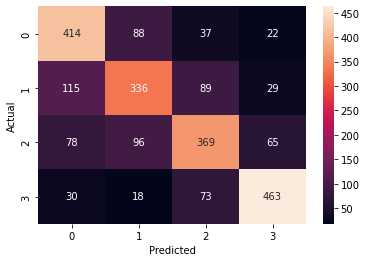

In [22]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()